In [150]:
import copy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the training set

In [151]:
def read_training_set():
    data = pd.read_csv("training_data.csv")
    X_train = data.drop('y', axis=1).values  # All columns except 'y' as features
    Y_train = data['y'].values
    # 'y' column as target
    return X_train, Y_train

## z-score normalization

In [152]:
def normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

### Model function

In [153]:
def calculate_model(x, w, b):
    return np.dot(x, w) + b

### Cost function

In [154]:
def calculate_cost(w: np.array, b, x: np.array, y: np.array):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        yh = calculate_model(x[i],w,b)
        cost += (yh - y[i])**2
    cost = cost / (2*m)
    return cost

### Compute Gradient

In [155]:
def compute_gradient(w, b, x: np.array, y: np.array):
    m, n = x.shape  # Fixed: removed parentheses
    dj_dw = np.zeros((n,))
    dj_db = 0  # Fixed: initialized dj_db

    for i in range(m):
        error = calculate_model(x[i], w, b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error * x[i, j]
        dj_db = dj_db + error

    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

# Gradient Descent

In [156]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, epsilon=1e-7):

    w = copy.deepcopy(w_in)
    b = b_in
    J_hist = []
    prev_cost = float('inf')

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(w, b, x, y)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        current_cost = cost_function(w, b, x, y)

        if i % 100 == 0:
            J_hist.append(current_cost)

        if abs(prev_cost - current_cost) < epsilon:
            return w, b, J_hist

        prev_cost = current_cost

    return w, b, J_hist

b,w found by gradient descent: -1030.91,[304.98720876 284.98610386] 


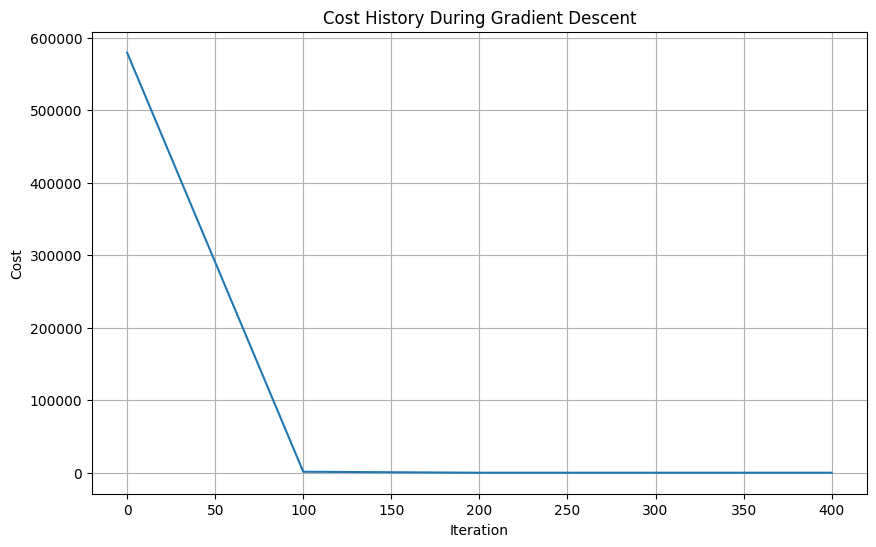

In [157]:
X_train, y_train = read_training_set()
X_train, mu, sigma = normalize(X_train)

# initialize parameters
w_init = np.zeros(X_train.shape[1])  # Fixed: initialize with correct shape
initial_w = np.zeros_like(w_init)
initial_b = 0.

# some gradient descent settings
iterations = 10000000
alpha = 0.03
epsilon = 1e-7

# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                          calculate_cost, compute_gradient,
                                          alpha, iterations, epsilon)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")



# Plot cost vs iteration
# Plot cost vs iteration
plt.figure(figsize=(10, 6))
iterations_per_point = 100
iterations_completed = len(J_hist) * iterations_per_point
x_values = range(0, iterations_completed, iterations_per_point)
plt.plot(x_values, J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History During Gradient Descent")
plt.grid(True)
plt.show()